# Chapter 3 homework - Charting

    # This is a basic example, but it should layout the process of data mining.
    # If your hypthesis is more complex, you'll have to do more calculcations before presenting/coming to a conclusion.
        # But the process stays ultimatelty the same
            # Define requirements
            # Data collections
            # Perform calculcations/build model
            # Relay your findings / conclusion

- prompt: output and chart the percentages of customer ratings
- Hypothesis: One or two rating will have the majority of entries
- Null :      No specific rating will be most common
   
### Import your data
- You will find this dataset on Canva under Files -> Datafiles -> Week 7 -> amazon_products.csv Download amazon_products.csv
- Output/print the first three rows
- Change the "average_review_rating" column to only show float values instead of "5.0 out of 5 stars".
- I/e  "5.0 out of 5 stars" changes to 5.0 
- Output/print the first three rows of the column 'average_review_rating' 

### Using bins,
- Output the total count of each review using "uniq-id" as your output column using bins = [0, 1, 2, 3, 4, 5]
- Using your bins, calculate and output each bin's percentage using "uniq-id" as your output column. 

### Using Buckets,
- Create/cut ten buckets and add them to your data using the "bucket" column name.
- Output the count of "uniq_id" for each bucket
- Output your buckets as a bar chart
- Output your buckets as a pie chart using the "uniq_id" column for counts

## More Notes
- Basic example but should layout the process of data mining
- If your hypothesis is more complex, you will do the same thing with more calculations 
- The data mining process untimately stays the same:
    1. Define our requirements
    2. Data collections  --> Can also be data cleansing 
    3. Perform calculations / build model
    4. Relay our finding / conclusions
    
    
# Prompt 
    - Output and chart the percentages of customer rating 
    - Hypothesis: One or two rating will have the majority or rating
    - Null hypothesis: No specific rating will be "most common" or a even distribution between all ratings 

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

data = pd.read_csv('Amazon_Products.csv')
(data[0:2])

,uniq_id,product_name,manufacturer,price,number_available_in_stock,number_of_reviews,number_of_answered_questions,average_review_rating,amazon_category_and_sub_category,description,product_information,product_description,items_customers_buy_after_viewing_this_item,customer_questions_and_answers
0,eac7efa5dbd3d667f26eb3d3ab504464,Hornby 2014 Catalogue,Hornby,£3.42,5 new,15.0,1.0,4.9 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Product Description Hornby 2014 Catalogue Box ...,Technical Details Item Weight640 g Product Dim...,Product Description Hornby 2014 Catalogue Box ...,http://www.amazon.co.uk/Hornby-R8150-Catalogue...,Does this catalogue detail all the previous Ho...
1,b17540ef7e86e461d37f3ae58b7b72ac,FunkyBuys® Large Christmas Holiday Express Fes...,FunkyBuys,£16.99,NaN,2.0,1.0,4.5 out of 5 stars,Hobbies > Model Trains & Railway Sets > Rail V...,Size Name:Large FunkyBuys® Large Christmas Hol...,Technical Details Manufacturer recommended age...,Size Name:Large FunkyBuys® Large Christmas Hol...,http://www.amazon.co.uk/Christmas-Holiday-Expr...,can you turn off sounds // hi no you cant turn...


In [2]:
print(data['average_review_rating'][0:2])

0    4.9 out of 5 stars
1    4.5 out of 5 stars
Name: average_review_rating, dtype: object


In [3]:
# Fix review column to only show float values 
    # STRING REPLACEMENT METHOD - like find and replace
    # astype()
    # How to add a column // data['NAME_GOES_HERE']
    
data['average_review_rating'] = data['average_review_rating'].str.replace(' out of 5 stars','')
print(data['average_review_rating'][0:2])

0    4.9
1    4.5
Name: average_review_rating, dtype: object


In [4]:
# Check for floats

print(data['average_review_rating'][0:5].sum()) # This is what a string looks like when summed NOT a float

4.94.53.95.04.7


In [5]:
# Float conversion 

data['average_review_rating'] = data['average_review_rating'].astype(float)

In [6]:
# Check for floats again

print(data['average_review_rating'][0:5].sum()) # This is how a numerical column is treated when summed NOT a string

23.0


In [7]:
# Output the total count for each review score

total_count_scores = data.groupby('average_review_rating').count()
print(total_count_scores['uniq_id'])

average_review_rating
3.0       3
3.3       1
3.5       2
3.7       2
3.8       1
3.9       6
4.0     655
4.1      74
4.2     106
4.3     212
4.4     153
4.5     355
4.6     176
4.7     257
4.8     276
4.9     101
5.0    2602
Name: uniq_id, dtype: int64


In [8]:
# Calculate the total number of entries based on the number of iniq_id 
total_count = data['uniq_id'].count()
print(total_count) # Total responces

4994


In [9]:
# Bins - the percentage of each review bin
    # Defining our bins
bins = [0, 1, 2, 3, 4, 5]
data['binned'] = pd.cut(data['average_review_rating'], bins)
print(data['binned'][:5])

# Grouped bins

grouped_bins = data.groupby('binned').count()
print(grouped_bins['uniq_id'])

# Getting the percentage 

grouped_percent = data.groupby('binned')['uniq_id'].count() / total_count * 100
print(grouped_percent)

0    (4, 5]
1    (4, 5]
2    (3, 4]
3    (4, 5]
4    (4, 5]
Name: binned, dtype: category
Categories (5, interval[int64]): [(0, 1] < (1, 2] < (2, 3] < (3, 4] < (4, 5]]
binned
(0, 1]       0
(1, 2]       0
(2, 3]       3
(3, 4]     667
(4, 5]    4312
Name: uniq_id, dtype: int64
binned
(0, 1]     0.000000
(1, 2]     0.000000
(2, 3]     0.060072
(3, 4]    13.356027
(4, 5]    86.343612
Name: uniq_id, dtype: float64


In [10]:
# Using our existing data, output the counts of each bucket
# Create a new column and cut 10 buckets // ( data , number of buckets)

data['bucket'] = pd.cut(data.average_review_rating, 10)
bucket_out = data[['bucket', 'uniq_id']].groupby('bucket').count()
print(bucket_out)

              uniq_id
bucket               
(2.998, 3.2]        3
(3.2, 3.4]          1
(3.4, 3.6]          2
(3.6, 3.8]          3
(3.8, 4.0]        661
(4.0, 4.2]        180
(4.2, 4.4]        365
(4.4, 4.6]        531
(4.6, 4.8]        533
(4.8, 5.0]       2703


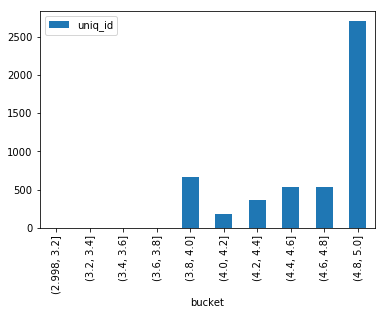

In [11]:
# Super easy bar charts

bucket_out.plot(kind = 'bar')
plt.show()

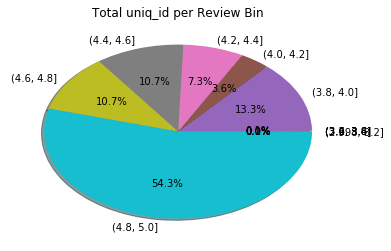

In [12]:
# Creating a pie chart 

plt.pie(
    bucket_out['uniq_id'], # Data
    labels = bucket_out.index, # Labels
    autopct='%1.1f%%', # Auto punctuation / decimal form
    shadow = True, # Fancy shadow
    startangle = 0 # Controls the display angle/rotation
)
plt.title('Total uniq_id per Review Bin')
plt.show()

## Since 4.8-5 stars is around 55% of our entries
## We can assume with some level of confidence that two or more scores are more likely than the others 
    - Reject the null hypothesis - there are NOT one or two values that will stick out
    - There infact are thus we accept the hypothesis 
    
- To be more confident in our results, we should run additional tests:
- Or even form a more numerically based hypothesis and conclusion 
    - I/E are rating and price correlated? 
    - If so what does that mean / what can we learn from this
    - Are cheaper products score higher? 
    - Maybe we want to figure out where there are no scores less than 2